In [21]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Mark 1

Use `numdifftools` to find the gradient of the function $f(x,y) = (2-x)^2 + 50(y-x^2)^2$ at points 
a. $(x,y) = (1,1)$
b. $(x,y) = (2,4)$

Plot the function and determine whether either of the points is a minimum. 

In [3]:
def f(X):
    x, y = X
    return (2 - x)**2 + 50 * (y - x**2)**2

In [4]:
grad_f = nd.Gradient(f)

point_a = np.array([1, 1])
point_b = np.array([2, 4])

grad_a = grad_f(point_a)
grad_b = grad_f(point_b)

In [5]:
x_vals = np.linspace(-2, 3, 100)
y_vals = np.linspace(-1, 6, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (2 - X)**2 + 50 * (Y - X**2)**2

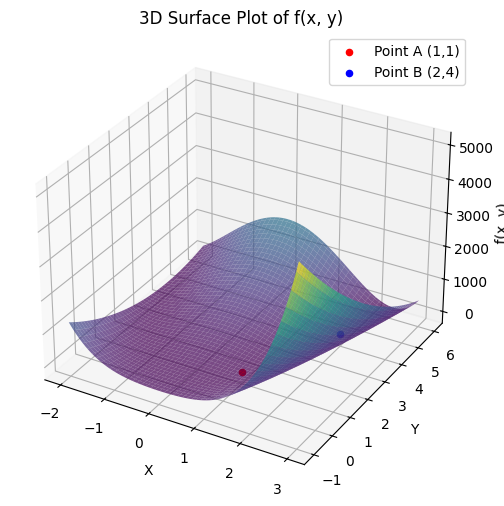

(array([-2.,  0.]), array([2.57727762e-13, 4.41409886e-14]))

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax.scatter(*point_a, f(point_a), color='red', label='Point A (1,1)')
ax.scatter(*point_b, f(point_b), color='blue', label='Point B (2,4)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D Surface Plot of f(x, y)')
ax.legend()

plt.show()

grad_a, grad_b

# Mark 2


Apply the gradient descent algorithm to the function $f(x,y) = (2-x)^2 + 50(y-x^2)^2$. Use $(x,y)  = (1,1)$ as the starting point. 

In [16]:
def f(x, y):
    return (2 - x)**2 + 50 * (y - x**2)**2

In [17]:
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

In [18]:
def gradient_descent(starting_point, alpha=0.001, tol=1e-6, max_iters=10000):
    x_val, y_val = starting_point
    trajectory = [(x_val, y_val)]

    for _ in range(max_iters):
        grad_x_val, grad_y_val = grad_f_numeric(x_val, y_val)
        
        # Update x and y with a smaller step size
        x_val -= alpha * grad_x_val
        y_val -= alpha * grad_y_val
        
        trajectory.append((x_val, y_val))

        # Check for convergence
        if np.linalg.norm([grad_x_val, grad_y_val]) < tol:
            break

    return np.array(trajectory)

In [19]:
trajectory = gradient_descent(starting_point=(1,1), alpha=0.001)

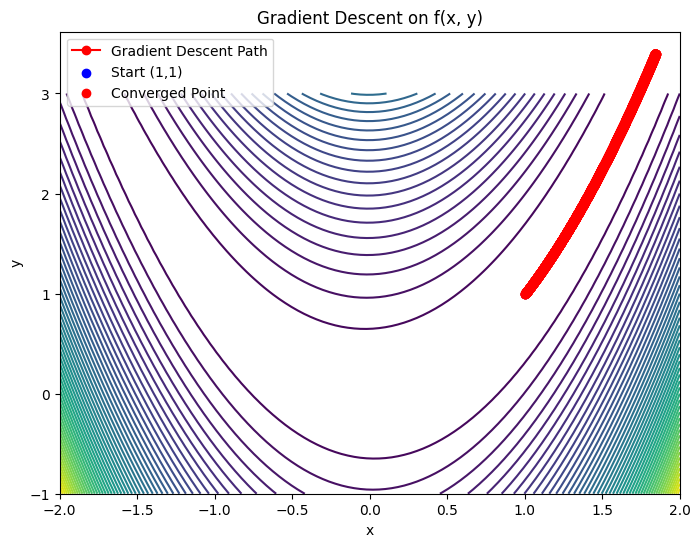

array([1.84341551, 3.39738946])

In [20]:
plt.figure(figsize=(8,6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r-o', label="Gradient Descent Path")
plt.scatter(trajectory[0, 0], trajectory[0, 1], color='blue', label="Start (1,1)")
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='red', label="Converged Point")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient Descent on f(x, y)")
plt.legend()
plt.show()

trajectory[-1]

# Mark 3

Rewrite the gradient descent algorithm as a proper function and test it for function minimization and data fitting problems. 

One function minimization problem could be the first problem of the set with the coeffcient $50$ replaced with a smaller number (like $10$). Data fitting could be for example to fit a function with more than one independent variable. 

In [22]:
def func_to_minimize(x, y):
    return (2 - x)**2 + 10 * (y - x**2)**2

In [23]:
def numerical_gradient(f, x, y, h=1e-5):
    df_dx = (f(x + h, y) - f(x - h, y)) / (2 * h)
    df_dy = (f(x, y + h) - f(x, y - h)) / (2 * h)
    return np.array([df_dx, df_dy])

In [25]:
def gradient_descent(f, start, alpha=0.01, tol=1e-6, max_iters=10000):
    x, y = start
    trajectory = [(x, y)]

    for _ in range(max_iters):
        grad_x, grad_y = numerical_gradient(f, x, y)
        x -= alpha * grad_x
        y -= alpha * grad_y

        trajectory.append((x, y))

        # Check for convergence
        if np.linalg.norm([grad_x, grad_y]) < tol:
            break

    return np.array(trajectory), (x, y)


trajectory, final_point = gradient_descent(func_to_minimize, start=(1,1), alpha=0.01)

In [26]:
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = func_to_minimize(X, Y)


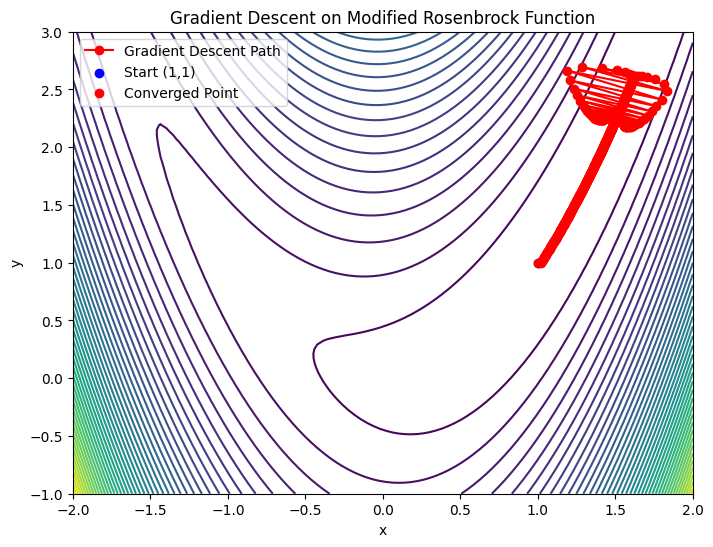

(1.579951918830254, 2.2061403641904547)

In [27]:
plt.figure(figsize=(8,6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r-o', label="Gradient Descent Path")
plt.scatter(trajectory[0, 0], trajectory[0, 1], color='blue', label="Start (1,1)")
plt.scatter(final_point[0], final_point[1], color='red', label="Converged Point")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient Descent on Modified Rosenbrock Function")
plt.legend()
plt.show()

final_point